In [1]:
# Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv('random_stock_market_dataset.csv')
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847


As we can see, the dataset contains 6 columns, a date column and others are OHLCV data of the stock.
Now we will understand more by printing the information of each column.

In [3]:
# Display columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Open    60 non-null     float64
 2   High    60 non-null     float64
 3   Low     60 non-null     float64
 4   Close   60 non-null     float64
 5   Volume  60 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


This dataset contains the 60-day data of the stock price. 
We will set the 'Date' column as index column to create time-series.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
print(df.index)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

In [5]:
# Count rows where High is less than Low (boolean sum)
count = (df['High'] < df['Low']).sum()
print(count)

0


### Descriptive Statistics about the dataset

In [6]:
# Basic statistics
df.describe()

,Open,High,Low,Close,Volume
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,310.552000,322.589833,308.056833,320.412667,95405.516667
std,108.859051,109.095813,108.986426,109.157159,54895.342146
min,112.680000,123.780000,109.430000,121.270000,13193.000000
25%,222.957500,238.247500,220.042500,237.242500,48016.500000
50%,303.240000,313.800000,302.385000,309.385000,93850.500000
75%,396.150000,415.915000,392.905000,413.462500,130917.250000
max,492.790000,501.670000,492.300000,500.420000,195189.000000


### Close Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

<Axes: title={'center': 'Close Price Over Time'}, xlabel='Date'>

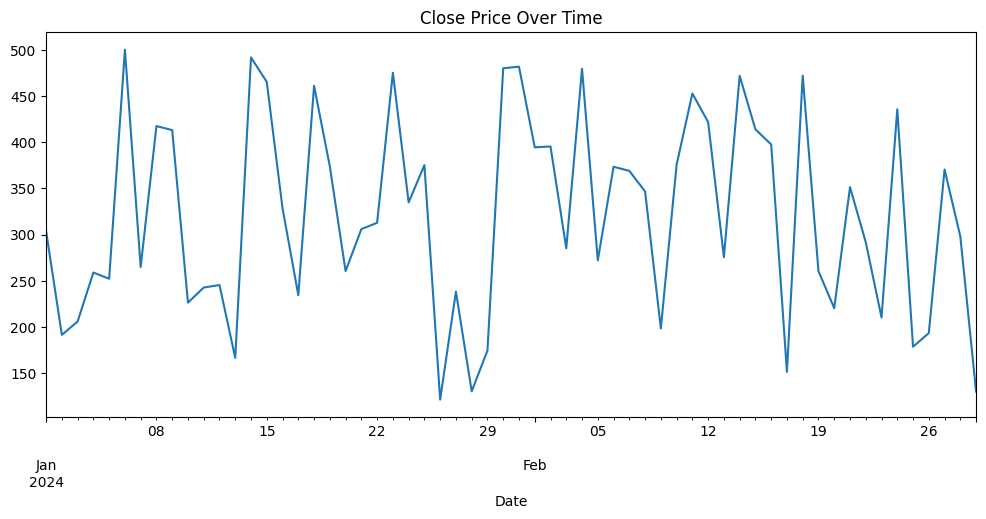

In [7]:
# Plot close price over time
df['Close'].plot(figsize=(12,5), title="Close Price Over Time")

### Volume of Sales

,Close,Volume(k)
Close,1.000000,-0.138425
Volume(k),-0.138425,1.000000


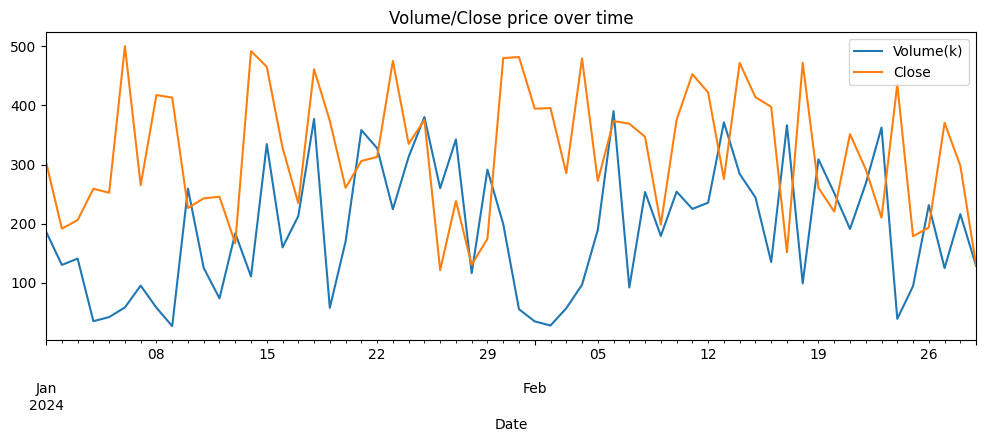

In [8]:
df['Volume(k)'] = df['Volume'] / 500
df[['Volume(k)', 'Close']].plot(figsize=(12,4), title="Volume/Close price over time")
df[['Close', 'Volume(k)']].corr()

### Moving average of the stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time. In this situation, since the dataset has small size, I choose 3 and 7 days.

<Axes: title={'center': 'Close with Moving Averages'}, xlabel='Date'>

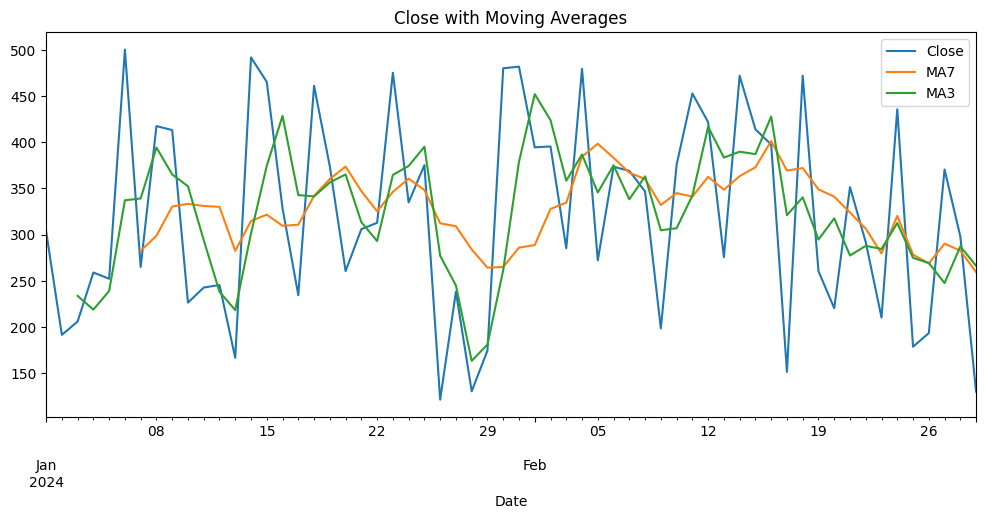

In [9]:
# Moving averages
df['MA7'] = df['Close'].rolling(7).mean()
df['MA3'] = df['Close'].rolling(3).mean()

df[['Close','MA7','MA3']].plot(figsize=(12,5), title="Close with Moving Averages")

### Daily Returns

- What the chart shows  
    - Day-to-day percentage changes of the Close price (df['Return'] = Close.pct_change()).  
    - Values above 0 → positive daily return (price increased); values below 0 → negative daily return (price decreased).  
    - The vertical axis is percent-change (decimal form), the horizontal axis is time (Date index).

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

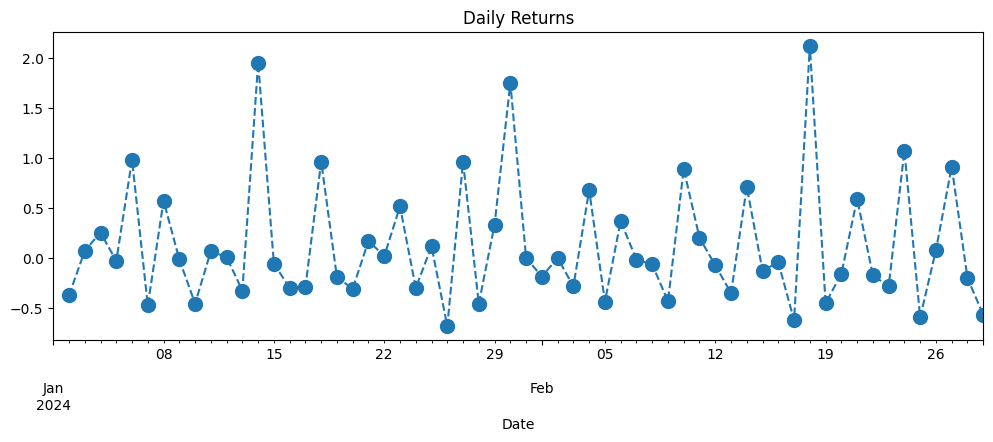

In [10]:
# Calculate and plot daily returns
df['Return'] = df['Close'].pct_change()
df['Return'].plot(figsize=(12,4), title="Daily Returns", marker='o', markersize=10, linestyle='--')

Text(0.5, 1.0, 'Histogram of Daily Returns')

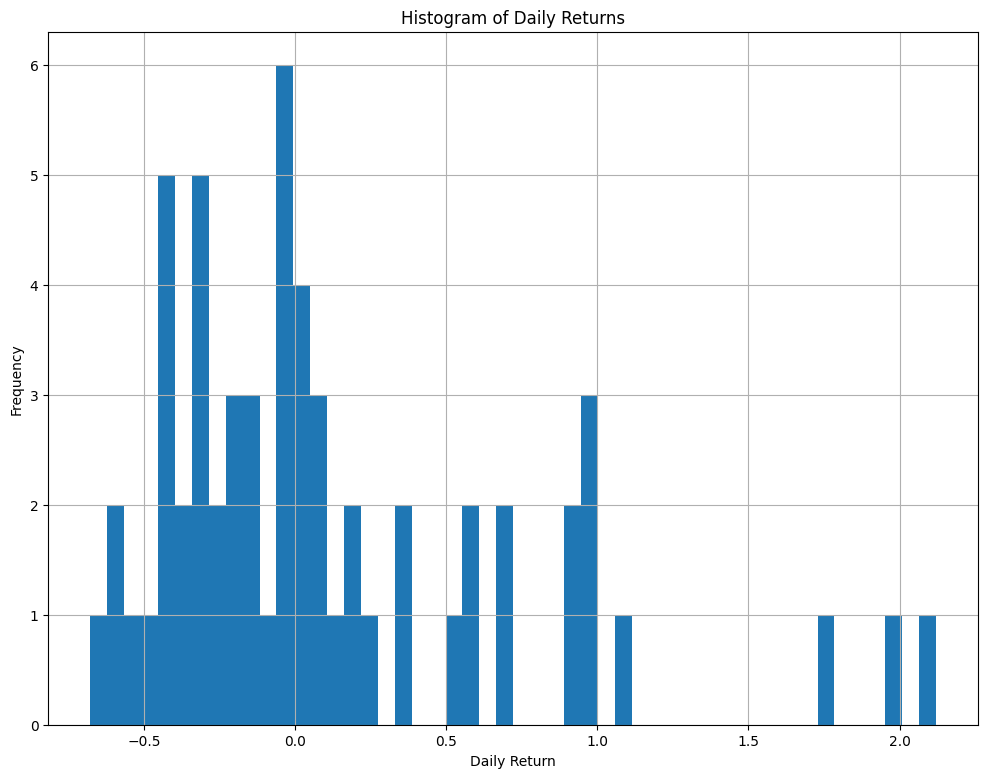

In [11]:
plt.figure(figsize=(12, 9))
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
df['Return'].hist(bins=50)
plt.title('Histogram of Daily Returns')

### Correlations between columns

In [12]:
# Correlation matrix between columns
df[['Open','High','Low','Close','Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999174,0.999920,0.999174,-0.133607
High,0.999174,1.000000,0.999066,0.999912,-0.136512
Low,0.999920,0.999066,1.000000,0.999075,-0.129752
Close,0.999174,0.999912,0.999075,1.000000,-0.138425
Volume,-0.133607,-0.136512,-0.129752,-0.138425,1.000000


### Stationary Test for ARIMA

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.945857901678936
p-value: 9.976773330738153e-10


This test concludes that ARIMA is possible.

## Feature engineering

### Train-test splitting

In [14]:
df.drop(columns=['MA7','MA3','Volume(k)', 'Return'], axis=1, inplace=True)
df['Target'] = df['Close'].shift(-1) / df['Close'] - 1
print(df)

train_size = int(len(df) - 15)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

              Open    High     Low   Close  Volume    Target
Date                                                        
2024-01-01  296.45  307.31  293.96  303.72   93133 -0.369814
2024-01-02  190.11  193.10  187.21  191.40   64993  0.075705
2024-01-03  197.41  208.64  193.37  205.89   70326  0.257710
2024-01-04  253.13  262.67  248.67  258.95   17358 -0.026067
2024-01-05  241.35  253.09  238.99  252.20   20847  0.984219
2024-01-06  492.79  501.67  492.30  500.42   29000 -0.470565
2024-01-07  258.01  265.61  254.37  264.94   47481  0.576206
2024-01-08  399.54  418.35  397.09  417.60   28766 -0.010369
2024-01-09  395.02  417.97  391.51  413.27   13193 -0.452295
2024-01-10  221.48  231.21  219.69  226.35  129565  0.072189
2024-01-11  231.79  243.40  230.82  242.69   62443  0.011249
2024-01-12  231.07  246.40  229.38  245.42   36696 -0.321612
2024-01-13  155.92  166.99  153.19  166.49   91831  1.955072
2024-01-14  481.91  492.40  477.12  491.99   55243 -0.054025
2024-01-15  455.69  469.

In [15]:
def calculate_features(df_input):
    """
    Calculates TREND and MOMENTUM features.
    No raw prices (like 'cl_lag_1') are used as features.
    """
    df = df_input.copy()
    close = df['Close']
    # lagged close columns (used as exogenous lag regressors)
    df['Close_lag_1'] = close.shift(1)
    df['Close_lag_2'] = close.shift(2)
    df['Close_lag_3'] = close.shift(3)
    # --- 1. RSI (Relative Strength Index) - Momentum ---
    delta = close.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['rsi_14'] = 100 - (100 / (1 + rs))
    
    # --- 2. MACD (Moving Average Convergence Divergence) - Trend ---
    # Normalized by price to keep it relative
    ema12 = close.ewm(span=12, adjust=False).mean()
    ema26 = close.ewm(span=26, adjust=False).mean()
    macd_line = ema12 - ema26
    signal_line = macd_line.ewm(span=9, adjust=False).mean()
    df['macd_hist_norm'] = (macd_line - signal_line) / close # Histogram normalized
    
    # --- 3. Simple Moving Average Trends ---
    sma_5 = close.rolling(window=5).mean()
    sma_10 = close.rolling(window=10).mean()
    
    # Ratio > 1 means Up Trend, < 1 means Down Trend
    df['sma_5_10_cross'] = sma_5 / sma_10 
    df['dist_from_sma_5'] = (close - sma_5) / sma_5
    
    # --- 4. Volatility (Normalized) ---
    # Standard Deviation divided by Price (Coefficient of Variation)
    df['volatility_5_norm'] = close.rolling(5).std() / close
    
    # --- 5. Slope (Trajectory) ---
    def rolling_slope(y):
        if len(y) < 2 or np.isnan(y).any():
            return 0.0
        x = np.arange(len(y))
        # Normalize y to percentages so slope is comparable across price levels
        y_norm = y / y[0] 
        return np.polyfit(x, y_norm, 1)[0]
    
    df['slope_5'] = close.rolling(5).apply(rolling_slope, raw=True)
    
    # --- 6. Recent Returns (Momentum) ---
    # --- 6. Recent Returns (Momentum) ---
    df['ret_1'] = close.pct_change(1)
    # Rolling means
    df['rolling_mean_3'] = close.rolling(3).mean()
    df['rolling_mean_5'] = close.rolling(5).mean()
    # Rolling standard deviation
    df['rolling_std_5'] = close.rolling(5).std()
    # Rate of Change over 5 periods
    df['ROC_5'] = close.pct_change(5)
    # Short exponential moving average
    df['EMA_5'] = close.ewm(span=5, adjust=False).mean()
    df['ret_3'] = close.pct_change(3)
    # rolling std of recent returns (momentum volatility)
    df['rolling_std_return_5'] = df['ret_1'].rolling(window=5).std()
    df['rolling_std_return_10'] = df['ret_1'].rolling(window=10).std()

    # lagged returns for short-term momentum (return_lag)
    df['return_lag_1'] = df['ret_1'].shift(1)
    df['return_lag_2'] = df['ret_1'].shift(2)
    df['return_lag_3'] = df['ret_1'].shift(3)
    df['return_lag_5'] = df['ret_1'].shift(5)
    
    return df

In [16]:
# Improved features and hyperparameter tuning helpers
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import xgboost as xgb

def calculate_features_improved(df_input):
    """
    Enhanced features built on top of `calculate_features`.
    Returns a dataframe with additional engineered columns.
    """
    df = calculate_features(df_input).copy()
    close = df['Close']
    # Log returns (short windows)
    df['log_ret_1'] = np.log(close) - np.log(close.shift(1))
    df['log_ret_3'] = np.log(close) - np.log(close.shift(3))
    # ATR-like feature (True Range normalized by price)
    tr1 = df['High'] - df['Low']
    tr2 = (df['High'] - df['Close'].shift(1)).abs()
    tr3 = (df['Low'] - df['Close'].shift(1)).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    df['ATR_14_norm'] = tr.rolling(14).mean() / df['Close']
    # Percentile rank of recent returns over 5 periods (momentum quantile)
    df['ret_5_rank'] = df['ret_1'].rolling(5).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1] if len(x)>0 else 0)
    # Simple volatility slope: change in rolling std over 5->10 windows
    df['vol_slope'] = (df['rolling_std_return_10'] - df['rolling_std_return_5']).fillna(0)
    # Fill NaNs conservatively (forward then zeros) to avoid leakage from future data
    df = df.fillna(method='ffill').fillna(0)
    return df

def tune_models(X, y, n_iter=12):
    """Performs time-series-aware randomized search for RF and XGB.
    Returns best estimators (rf_best, xgb_best)."""
    n_splits = min(4, max(2, len(X) // 10))
    tss = TimeSeriesSplit(n_splits=n_splits)
    param_rf = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [5, 8, 10, 15, None],
        'min_samples_split': [2, 4, 6],
    }
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rs_rf = RandomizedSearchCV(rf, param_distributions=param_rf, n_iter=min(n_iter, 12), cv=tss, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    rs_rf.fit(X, y)
    print('Best RF params:', rs_rf.best_params_)
    param_xgb = {
        'n_estimators': [200, 500, 1000],
        'learning_rate': [0.01, 0.03, 0.05],
        'max_depth': [4, 6, 8],
        'subsample': [0.7, 0.85, 1.0],
    }
    xg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist', n_jobs=-1)
    rs_xgb = RandomizedSearchCV(xg, param_distributions=param_xgb, n_iter=min(n_iter, 12), cv=tss, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    rs_xgb.fit(X, y)
    print('Best XGB params:', rs_xgb.best_params_)
    return rs_rf.best_estimator_, rs_xgb.best_estimator_

# Example usage (commented to avoid long runs):
# train_feat_for_tune = calculate_features_improved(train).dropna()
# X_tune = train_feat_for_tune[rf_features]
# y_tune = train_feat_for_tune['Target'].values
# rf_best, xgb_best = tune_models(X_tune, y_tune, n_iter=10)


In [17]:
rf_features = [
    'Close',
    'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_5',
    'rsi_14',
    'ROC_5',
    'rolling_std_return_5',
    'rolling_std_return_10',
    # improved features
    'ATR_14_norm', 'ret_5_rank', 'log_ret_1', 'vol_slope',
]

In [18]:
# Run tuning (enable by setting run_tuning=True)
run_tuning = True
if run_tuning:
    try:
        print("Starting hyperparameter tuning (n_iter=6)...")
        train_feat_for_tune = calculate_features_improved(train).dropna()
        X_tune = train_feat_for_tune[rf_features]
        y_tune = train_feat_for_tune['Target'].values
        rf_best, xgb_best = tune_models(X_tune, y_tune, n_iter=6)
        import joblib
        joblib.dump(rf_best, 'rf_best.joblib')
        joblib.dump(xgb_best, 'xgb_best.joblib')
        print("Tuning completed and models saved: rf_best.joblib, xgb_best.joblib")
    except Exception as e:
        print("Tuning failed:", e)
else:
    print("Tuning skipped. Set run_tuning=True to enable.")

Starting hyperparameter tuning (n_iter=6)...
Best RF params: {'n_estimators': 300, 'min_samples_split': 4, 'max_depth': None}
Best XGB params: {'subsample': 0.85, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01}
Tuning completed and models saved: rf_best.joblib, xgb_best.joblib


In [19]:
# --- Build train features (use improved features) ---
train_only = calculate_features_improved(train)

rf_features = [f for f in rf_features if f in train_only.columns]
train_only = train_only.dropna()

X_train = train_only[rf_features]
y_train = train_only['Target']
y_test = test['Close']
y_test_return = test['Target'].dropna()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1, max_depth=10)
model.fit(X_train_scaled, y_train)

preds_rf = []
current_history = train.copy()

print("\n--- Starting Recursive Forecast ---")

for i in range(len(test)):
    recent_history = current_history.iloc[-30:].copy()
    feat_df = calculate_features_improved(recent_history)
    
    recent_history = current_history.iloc[-40:].copy()
    feat_df = calculate_features_improved(recent_history)
    
    last_feature_row = feat_df.iloc[[-1]][rf_features].fillna(0)
    
    X_step_scaled = scaler.transform(last_feature_row)
    pred_return = model.predict(X_step_scaled)[0]
    
    last_known_close = current_history.iloc[-1]['Close']
    pred_next_close = last_known_close * (1 + pred_return)
    
    preds_rf.append(pred_next_close)
    
    next_date = test.index[i]
    
    new_row = pd.DataFrame({
        'Open': [pred_next_close],
        'High': [pred_next_close],
        'Low': [pred_next_close],
        'Close': [pred_next_close],
        'Volume': [current_history.iloc[-1]['Volume']],
        'Target': [np.nan]
    }, index=[next_date])
    
    current_history = pd.concat([current_history, new_row])
    
    print(f"Step {i+1} ({next_date.date()}): Model predicts return {pred_return:+.4%}. Calculated Price: {pred_next_close:.2f}")

# Metrics (test only used for evaluation)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
mae_rf = mean_absolute_error(y_test, preds_rf)
r2_rf = r2_score(y_test, preds_rf)
print(f"Test RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R2: {r2_rf:.4f}")


--- Starting Recursive Forecast ---
Step 1 (2024-02-15): Model predicts return -10.7173%. Calculated Price: 421.47
Step 2 (2024-02-16): Model predicts return -25.0339%. Calculated Price: 315.96
Step 3 (2024-02-17): Model predicts return +5.2474%. Calculated Price: 332.54
Step 4 (2024-02-18): Model predicts return -10.8451%. Calculated Price: 296.47
Step 5 (2024-02-19): Model predicts return -5.5911%. Calculated Price: 279.90
Step 6 (2024-02-20): Model predicts return +10.1587%. Calculated Price: 308.33
Step 7 (2024-02-21): Model predicts return -17.9681%. Calculated Price: 252.93
Step 8 (2024-02-22): Model predicts return +23.0850%. Calculated Price: 311.32
Step 9 (2024-02-23): Model predicts return -25.5461%. Calculated Price: 231.79
Step 10 (2024-02-24): Model predicts return +48.7632%. Calculated Price: 344.82
Step 11 (2024-02-25): Model predicts return -33.2901%. Calculated Price: 230.03
Step 12 (2024-02-26): Model predicts return +49.1074%. Calculated Price: 342.99
Step 13 (2024-

In [20]:
import xgboost as xgb

xgb_features = [
    'Close',
    'Close_lag_1', 'Close_lag_2', 'Close_lag_3',
    'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_5',
    'rsi_14',
    'ROC_5',
    'rolling_std_return_5',
    'rolling_std_return_10',
    'rolling_mean_3',
    'rolling_mean_5',
    'rolling_std_5',
    'EMA_5'
]

# Prepare training data using the improved feature function
train_feat = calculate_features_improved(train).dropna()
X_train = train_feat[xgb_features]
y_train = train_feat['Target'].values

# Fit scaler on training features
scaler_xgb = StandardScaler()
X_train_scaled = scaler_xgb.fit_transform(X_train)

# Train XGBoost to predict returns (Target), same objective as before
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=8,
    min_child_weight=3,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_lambda=2.0,
    reg_alpha=1.0,
    objective="reg:squarederror",
    tree_method="hist",
    random_state=42,
)
# For evaluation we can prepare test features where possible (not used for recursive forecasting)
test_feat = calculate_features_improved(test).dropna()
X_test_for_eval = test_feat[xgb_features].fillna(0) if not test_feat.empty else pd.DataFrame(columns=xgb_features)
X_test_scaled = scaler_xgb.transform(X_test_for_eval) if not X_test_for_eval.empty else np.empty((0, len(xgb_features)))
y_test_for_eval = test_feat['Target'].values if not test_feat.empty else np.array([])

xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test_for_eval)] if X_test_scaled.size else None, verbose=False)

# Recursive forecasting (same approach as Random Forest cell) => produce predicted close prices
preds_xgb = []
current_history = train.copy()

print("\n--- Starting XGBoost Recursive Forecast ---")
for i in range(len(test)):
    recent_history = current_history.iloc[-40:].copy()
    feat_df = calculate_features_improved(recent_history)
    last_feature_row = feat_df.iloc[[-1]][xgb_features].fillna(0)
    
    X_step_scaled = scaler_xgb.transform(last_feature_row)
    pred_return = xgb_model.predict(X_step_scaled)[0]
    
    last_known_close = current_history.iloc[-1]['Close']
    pred_next_close = last_known_close * (1 + pred_return)
    preds_xgb.append(pred_next_close)
    
    next_date = test.index[i]
    new_row = pd.DataFrame({
        'Open': [pred_next_close],
        'High': [pred_next_close],
        'Low': [pred_next_close],
        'Close': [pred_next_close],
        'Volume': [current_history.iloc[-1]['Volume']],
        'Target': [np.nan]
    }, index=[next_date])
    current_history = pd.concat([current_history, new_row])
    
    print(f"Step {i+1} ({next_date.date()}): Model predicts return {pred_return:+.4%}. Calculated Price: {pred_next_close:.2f}")

# Evaluation against true close prices in test
y_test_close = test['Close'].values
rmse_xgb = np.sqrt(mean_squared_error(y_test_close, preds_xgb))
mae_xgb = mean_absolute_error(y_test_close, preds_xgb)
r2_xgb = r2_score(y_test_close, preds_xgb)
print(f"XGBoost Close Price RMSE: {rmse_xgb:.4f} | MAE: {mae_xgb:.4f} | R2: {r2_xgb:.4f}")


--- Starting XGBoost Recursive Forecast ---
Step 1 (2024-02-15): Model predicts return -11.7989%. Calculated Price: 416.36
Step 2 (2024-02-16): Model predicts return -15.1384%. Calculated Price: 353.33
Step 3 (2024-02-17): Model predicts return -19.0809%. Calculated Price: 285.91
Step 4 (2024-02-18): Model predicts return +35.5433%. Calculated Price: 387.54
Step 5 (2024-02-19): Model predicts return -22.5341%. Calculated Price: 300.21
Step 6 (2024-02-20): Model predicts return +44.6806%. Calculated Price: 434.34
Step 7 (2024-02-21): Model predicts return -34.9873%. Calculated Price: 282.38
Step 8 (2024-02-22): Model predicts return +53.9461%. Calculated Price: 434.71
Step 9 (2024-02-23): Model predicts return -26.1649%. Calculated Price: 320.97
Step 10 (2024-02-24): Model predicts return +7.7417%. Calculated Price: 345.82
Step 11 (2024-02-25): Model predicts return -22.1854%. Calculated Price: 269.10
Step 12 (2024-02-26): Model predicts return +46.4284%. Calculated Price: 394.03
Step 

In [21]:
from sklearn.linear_model import LinearRegression

# Prepare training features (same as XGB / RF) using improved features
train_feat = calculate_features_improved(train).dropna()
X_train = train_feat[rf_features]
y_train = train_feat['Target'].values

# Fit local scaler and linear model to predict returns (Target)
lr_scaler = StandardScaler()
X_train_scaled = lr_scaler.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Recursive forecasting (same approach as RF and XGB) -> produce predicted close prices
preds_lr = []
current_history = train.copy()

print("\n--- Starting LinearRegression Recursive Forecast ---")
for i in range(len(test)):
    recent_history = current_history.iloc[-40:].copy()
    feat_df = calculate_features_improved(recent_history)
    last_feature_row = feat_df.iloc[[-1]][rf_features].fillna(0)
    
    X_step_scaled = lr_scaler.transform(last_feature_row)
    pred_return = lr.predict(X_step_scaled)[0]
    
    last_known_close = current_history.iloc[-1]['Close']
    pred_next_close = last_known_close * (1 + pred_return)
    preds_lr.append(pred_next_close)
    
    next_date = test.index[i]
    new_row = pd.DataFrame({
        'Open': [pred_next_close],
        'High': [pred_next_close],
        'Low': [pred_next_close],
        'Close': [pred_next_close],
        'Volume': [current_history.iloc[-1]['Volume']],
        'Target': [np.nan]
    }, index=[next_date])
    current_history = pd.concat([current_history, new_row])
    
    print(f"Step {i+1} ({next_date.date()}): Model predicts return {pred_return:+.4%}. Calculated Price: {pred_next_close:.2f}")

# Evaluation against true close prices in test
rmse_lr = np.sqrt(mean_squared_error(y_test, preds_lr))
mae_lr = mean_absolute_error(y_test, preds_lr)
r2_lr = r2_score(y_test, preds_lr)
print(f"LinearRegression Close Price RMSE: {rmse_lr:.4f} | MAE: {mae_lr:.4f} | R2: {r2_lr:.4f}")

# Show top coefficients
coef = pd.Series(lr.coef_, index=rf_features)
coef_order = coef.abs().sort_values(ascending=False).index
print("Top coefficients (by magnitude):")
print(coef.reindex(coef_order).head(10))


--- Starting LinearRegression Recursive Forecast ---
Step 1 (2024-02-15): Model predicts return -40.0685%. Calculated Price: 282.91
Step 2 (2024-02-16): Model predicts return +25.8188%. Calculated Price: 355.96
Step 3 (2024-02-17): Model predicts return +5.6621%. Calculated Price: 376.11
Step 4 (2024-02-18): Model predicts return -6.0526%. Calculated Price: 353.35
Step 5 (2024-02-19): Model predicts return -1.8729%. Calculated Price: 346.73
Step 6 (2024-02-20): Model predicts return -1.1023%. Calculated Price: 342.91
Step 7 (2024-02-21): Model predicts return -1.8385%. Calculated Price: 336.60
Step 8 (2024-02-22): Model predicts return -2.0307%. Calculated Price: 329.77
Step 9 (2024-02-23): Model predicts return -5.5659%. Calculated Price: 311.41
Step 10 (2024-02-24): Model predicts return -2.1611%. Calculated Price: 304.68
Step 11 (2024-02-25): Model predicts return +6.8620%. Calculated Price: 325.59
Step 12 (2024-02-26): Model predicts return +16.3574%. Calculated Price: 378.85
Step

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# prepare series and features (use improved features)
train_feat = calculate_features_improved(train).dropna().copy()
series = train_feat['Close'].astype(float)

# quick grid search for small ARIMA orders by AIC (no exog during the grid to keep it simple)
best_aic = np.inf
best_order = None
best_fit = None

for p in range(4):
    for d in range(2):
        for q in range(4):
            try:
                fit = ARIMA(series, order=(p, d, q)).fit(method_kwargs={"warn_convergence": False})
                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_order = (p, d, q)
                    best_fit = fit
            except Exception:
                continue

print("Best ARIMA order (p,d,q):", best_order, "AIC:", best_aic)

# Attempt to refit as ARIMAX using lagged close features (Close_lag_1/2/3) if available and valid
lag_cols = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3']
use_arimax = all(col in train_feat.columns for col in lag_cols)

if use_arimax:
    exog_train = train_feat[lag_cols].astype(float).loc[series.index]
    # ensure no NaNs in exog_train
    if exog_train.isna().any().any():
        use_arimax = False
    else:
        try:
            arimax_fit = ARIMA(series, order=best_order, exog=exog_train).fit(method_kwargs={"warn_convergence": False})
            best_fit = arimax_fit
            print("Refitted ARIMAX with exogenous lags:", lag_cols)
            use_arimax = True
        except Exception as e:
            print("ARIMAX refit failed, falling back to ARIMA. Error:", e)
            use_arimax = False

# Recursive forecasting:
n_steps = len(test)
preds_arima = []
current_history = train.copy()

if use_arimax:
    # For ARIMAX we forecast one step at a time, building exog row from the last closes (no peeking into test)
    for i in range(n_steps):
        # build exog row from last closes in current_history
        last_closes = current_history['Close'].iloc[::-1].values  # newest first
        # prepare lag values: Close_lag_1 = t-1, Close_lag_2 = t-2, ...
        exog_row = []
        for lag in range(1, 4):
            if len(last_closes) >= lag:
                exog_row.append(float(last_closes[lag-1]))
            else:
                # pad with the most recent known close if not enough history
                exog_row.append(float(last_closes[0]))
        exog_row = np.asarray(exog_row).reshape(1, -1)
        # forecast one step with provided exog
        try:
            fc_obj = best_fit.get_forecast(steps=1, exog=exog_row)
            pred_val = float(fc_obj.predicted_mean.iloc[0])
        except Exception:
            # fallback: use last observed close (naive)
            pred_val = float(current_history.iloc[-1]['Close'])
        preds_arima.append(pred_val)

        # append predicted row to history for next-step exog construction
        next_date = test.index[i]
        new_row = pd.DataFrame({
            'Open': [pred_val],
            'High': [pred_val],
            'Low': [pred_val],
            'Close': [pred_val],
            'Volume': [current_history.iloc[-1]['Volume']],
            'Target': [np.nan]
        }, index=[next_date])
        current_history = pd.concat([current_history, new_row])

else:
    # If ARIMAX not used, forecast horizon at once from the ARIMA fit (no exog)
    fc = best_fit.get_forecast(steps=n_steps).predicted_mean
    preds_arima = np.asarray(fc).astype(float).tolist()

# expose results for downstream cells
fc = np.asarray(preds_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, fc))
mae_arima = mean_absolute_error(y_test, fc)
r2_arima = r2_score(y_test, fc)
print(f"ARIMA Test RMSE: {rmse_arima:.4f}, MAE: {mae_arima:.4f}, R2: {r2_arima:.4f}")

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

Best ARIMA order (p,d,q): (0, 1, 1) AIC: 544.8105207777845


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Refitted ARIMAX with exogenous lags: ['Close_lag_1', 'Close_lag_2', 'Close_lag_3']
ARIMA Test RMSE: 113.2792, MAE: 98.9320, R2: -0.1294


In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# feature set for LSTM
features_for_lstm = rf_features

# prepare train features (engineered from train only) using improved features
train_feat_lstm = calculate_features_improved(train).dropna().copy()

# fit scaler on flat train features (used for all seq lengths)
scaler_lstm = StandardScaler()
scaler_lstm.fit(train_feat_lstm[features_for_lstm].values)

rmse_lstm = np.inf
best_seq = None
best_preds = None
best_model = None

seq_candidates = range(1, 8)  # 1..7

for seq in seq_candidates:
    # build sliding-window sequences from train_feat_lstm
    X_seq = []
    y_seq = []
    for i in range(seq, len(train_feat_lstm)):
        X_seq.append(train_feat_lstm[features_for_lstm].iloc[i-seq:i].values)
        y_seq.append(train_feat_lstm['Close'].iloc[i])
    if not X_seq:
        print(f"seq={seq}: not enough train rows -> skip")
        continue
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    
    # scale per feature (scaler already fitted on flat train features)
    nsamples, ntime, nfeat = X_seq.shape
    X_seq_flat = X_seq.reshape(-1, nfeat)
    X_seq_flat_s = scaler_lstm.transform(X_seq_flat)
    X_seq_s = X_seq_flat_s.reshape(nsamples, ntime, nfeat)
    
    # reproducible training
    tf.keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # small LSTM model (same architecture but input_shape depends on seq)
    model = Sequential([
        LSTM(64, input_shape=(seq, nfeat)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    es = EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss')
    model.fit(
        X_seq_s, y_seq,
        validation_split=0.1,
        epochs=200,
        batch_size=8,
        callbacks=[es],
        verbose=0
    )
    
    # recursive forecasting on test horizon (no peeking)
    preds = []
    current_history = train.copy()
    for i in range(len(test)):
        feat_df = calculate_features_improved(current_history.copy()).fillna(method='ffill').fillna(0)
        # if current_history shorter than seq (unlikely), skip
        if len(feat_df) < seq:
            last_seq = feat_df[features_for_lstm].iloc[-len(feat_df):].values
            # pad by repeating first row to match seq
            pad_count = seq - len(last_seq)
            if pad_count > 0:
                pad = np.tile(last_seq[[0]], (pad_count, 1))
                last_seq = np.vstack([pad, last_seq])
        else:
            last_seq = feat_df[features_for_lstm].iloc[-seq:].values
        
        last_seq_s = scaler_lstm.transform(last_seq).reshape(1, seq, nfeat)
        pred_close = model.predict(last_seq_s, verbose=0)[0,0]
        preds.append(pred_close)
        
        next_date = test.index[i]
        new_row = pd.DataFrame({
            'Open': [pred_close],
            'High': [pred_close],
            'Low': [pred_close],
            'Close': [pred_close],
            'Volume': [current_history.iloc[-1]['Volume']],
            'Target': [np.nan]
        }, index=[next_date])
        current_history = pd.concat([current_history, new_row])
    
    # evaluate on true closes
    y_test_close = test['Close'].values
    rmse_seq = np.sqrt(mean_squared_error(y_test_close, preds))
    print(f"seq={seq}: RMSE={rmse_seq:.4f}")
    
    if rmse_seq < rmse_lstm:
        rmse_lstm = rmse_seq
        best_seq = seq
        best_preds = preds
        best_model = model

# finalize
preds_lstm = best_preds
print(f"\nBest seq: {best_seq} with RMSE={rmse_lstm:.4f}")

# final evaluation print (already computed as rmse_lstm)
mae_lstm = mean_absolute_error(test['Close'].values, preds_lstm)
r2_lstm = r2_score(test['Close'].values, preds_lstm)

print(f"LSTM (seq={best_seq}) Close Price RMSE: {rmse_lstm:.4f} | MAE: {mae_lstm:.4f} | R2: {r2_lstm:.4f}")


seq=1: RMSE=112.5521
seq=2: RMSE=103.7603
seq=3: RMSE=145.4955
seq=4: RMSE=162.4100
seq=5: RMSE=110.2017
seq=6: RMSE=122.7033
seq=7: RMSE=116.1607

Best seq: 2 with RMSE=103.7603
LSTM (seq=2) Close Price RMSE: 103.7603 | MAE: 92.4259 | R2: 0.0524


In [24]:
from prophet import Prophet

n_steps = len(test)

prophet_df = train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']].copy()
prophet_df['dow'] = prophet_df['ds'].dt.dayofweek
prophet_df['month'] = prophet_df['ds'].dt.month

regressors = ['dow', 'month']

m_prophet = Prophet(weekly_seasonality=True, 
                    yearly_seasonality=False, 
                    daily_seasonality=False, 
                    n_changepoints=10, 
                    changepoint_prior_scale=0.15,
                    growth='linear')
for reg in regressors:
    m_prophet.add_regressor(reg)
m_prophet.fit(prophet_df)

future = m_prophet.make_future_dataframe(periods=n_steps, freq='D')

future = future.copy()
future['dow'] = future['ds'].dt.dayofweek
future['month'] = future['ds'].dt.month

future_reg = future[['ds'] + regressors].reset_index(drop=True)
future_reg = future_reg.fillna(method='ffill').fillna(method='bfill')

future_reg_horizon = future_reg.iloc[-n_steps:].reset_index(drop=True)

forecast = m_prophet.predict(future_reg_horizon)
preds_prophet = forecast['yhat'].values
preds_with_time = forecast[['ds', 'yhat']].reset_index(drop=True)

y_true = y_test.reset_index(drop=True).values
rmse_prophet = mean_squared_error(y_true, preds_prophet, squared=False)
mae_prophet = mean_absolute_error(y_true, preds_prophet)
r2_prophet = r2_score(y_true, preds_prophet)

print(f"Prophet Test RMSE: {rmse_prophet:.4f} | MAE: {mae_prophet:.4f} | R2: {r2_prophet:.4f}")

Importing plotly failed. Interactive plots will not work.
20:52:04 - cmdstanpy - INFO - Chain [1] start processing
20:52:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet Test RMSE: 144.8277 | MAE: 124.5457 | R2: -0.8461


In [25]:
from cycler import cycler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge
# build a stacking (blending) meta-model using OOF preds via TimeSeriesSplit
try:
    stack_features = rf_features
    train_feat_stack = calculate_features_improved(train).dropna()
    X_stack = train_feat_stack[stack_features]
    y_stack = train_feat_stack['Target'].values
    n_rows = len(X_stack)
    # require at least a few rows to do CV stacking
    if n_rows >= 10:
        tss = TimeSeriesSplit(n_splits=min(3, max(2, n_rows//5)))
        oof_rf = np.zeros(n_rows)
        oof_xgb = np.zeros(n_rows)
        oof_lr = np.zeros(n_rows)
        for train_idx, val_idx in tss.split(X_stack):
            X_tr, X_val = X_stack.iloc[train_idx], X_stack.iloc[val_idx]
            y_tr = y_stack[train_idx]
            scaler_s = StandardScaler()
            X_tr_s = scaler_s.fit_transform(X_tr)
            X_val_s = scaler_s.transform(X_val)
            # RF
            rf_cv = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=8)
            rf_cv.fit(X_tr_s, y_tr)
            oof_rf[val_idx] = rf_cv.predict(X_val_s)
            # XGB
            xgb_cv = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42, objective='reg:squarederror', tree_method='hist')
            xgb_cv.fit(X_tr_s, y_tr, verbose=False)
            oof_xgb[val_idx] = xgb_cv.predict(X_val_s)
            # LR
            lr_cv = LinearRegression()
            lr_cv.fit(X_tr_s, y_tr)
            oof_lr[val_idx] = lr_cv.predict(X_val_s)
        # meta train
        meta_X = np.vstack([oof_rf, oof_xgb, oof_lr]).T
        meta_y = y_stack
        meta_model = Ridge(alpha=1.0)
        meta_model.fit(meta_X, meta_y)
        print('Trained stacking meta-model (Ridge) on OOF predictions')
        # fit final base models on full training stack
        scaler_full = StandardScaler()
        X_full_s = scaler_full.fit_transform(X_stack)
        rf_full = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1, max_depth=10)
        rf_full.fit(X_full_s, y_stack)
        xgb_full = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=42, objective='reg:squarederror', tree_method='hist')
        xgb_full.fit(X_full_s, y_stack, verbose=False)
        lr_full = LinearRegression()
        lr_full.fit(X_full_s, y_stack)
        # recursive forecast using stacked meta-model
        preds_stack = []
        current_history_stack = train.copy()
        for i in range(len(test)):
            recent_history = current_history_stack.iloc[-40:].copy()
            feat_df = calculate_features_improved(recent_history)
            last_feature_row = feat_df.iloc[[-1]][stack_features].fillna(0)
            X_step_s = scaler_full.transform(last_feature_row)
            # base returns
            prf = rf_full.predict(X_step_s)[0]
            pxgb = xgb_full.predict(X_step_s)[0]
            plr = lr_full.predict(X_step_s)[0]
            meta_in = np.array([prf, pxgb, plr]).reshape(1, -1)
            pred_return = meta_model.predict(meta_in)[0]
            last_known_close = current_history_stack.iloc[-1]['Close']
            pred_next_close = last_known_close * (1 + pred_return)
            preds_stack.append(pred_next_close)
            next_date = test.index[i]
            new_row = pd.DataFrame({
                'Open': [pred_next_close],
                'High': [pred_next_close],
                'Low': [pred_next_close],
                'Close': [pred_next_close],
                'Volume': [current_history_stack.iloc[-1]['Volume']],
                'Target': [np.nan]
            }, index=[next_date])
            current_history_stack = pd.concat([current_history_stack, new_row])
        # metrics for stacked preds
        rmse_stack = np.sqrt(mean_squared_error(test['Close'].values, preds_stack))
        mae_stack = mean_absolute_error(test['Close'].values, preds_stack)
        r2_stack = r2_score(test['Close'].values, preds_stack)
        print(f'Stacked Ensemble Close Price RMSE: {rmse_stack:.4f} | MAE: {mae_stack:.4f} | R2: {r2_stack:.4f}')
    else:
        print('Not enough training rows for stacking CV (skipping stacked ensemble)')
except Exception as e:
    print('Stacking construction failed:', e)

Trained stacking meta-model (Ridge) on OOF predictions
Stacked Ensemble Close Price RMSE: 129.1954 | MAE: 102.6455 | R2: -0.4691


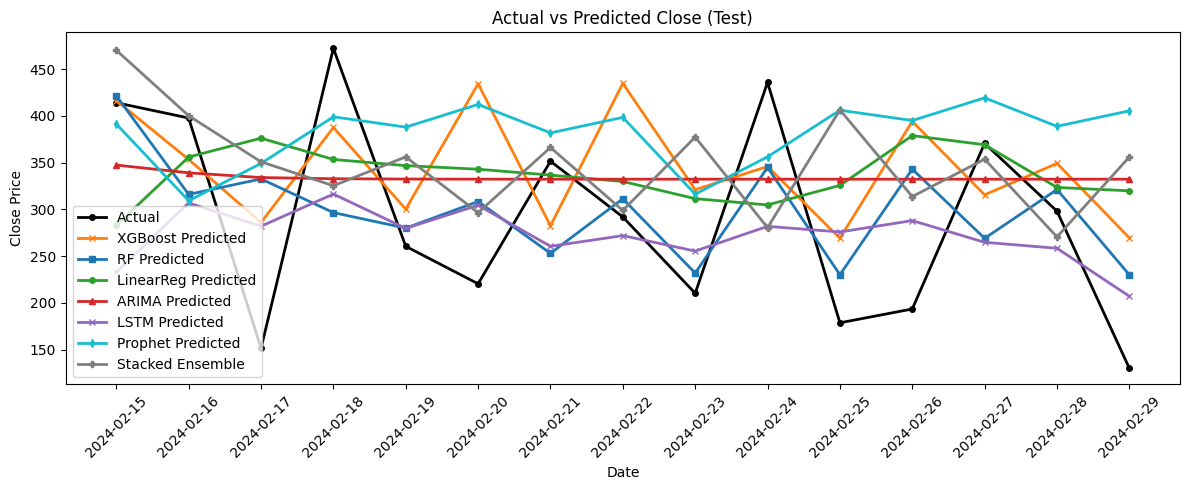

In [26]:
plt.figure(figsize=(12,5))
colors = ['black', 'tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:gray']
plt.gca().set_prop_cycle(cycler('color', colors))
# ensure ground truth is a flat numpy array
y_test_arr = np.array(y_test).flatten()
plt.plot(range(len(y_test_arr)), y_test_arr, label='Actual', marker='o', markersize=4, linewidth=2)
# helper to plot predictions safely (resize or trim to match test length)
def _safe_plot(preds, label, marker):
    p = np.array(preds).flatten()
    if p.size != y_test_arr.size:
        p = np.resize(p, y_test_arr.shape)
    plt.plot(range(len(p)), p, label=label, marker=marker, markersize=4, linewidth=2)
_safe_plot(preds_xgb, 'XGBoost Predicted', 'x')
_safe_plot(preds_rf, 'RF Predicted', 's')
_safe_plot(preds_lr, 'LinearReg Predicted', 'o')
_safe_plot(preds_arima, 'ARIMA Predicted', '^')
_safe_plot(preds_lstm, 'LSTM Predicted', 'x')
_safe_plot(preds_prophet, 'Prophet Predicted', 'd')
_safe_plot(preds_stack, 'Stacked Ensemble', 'P')

plt.legend()
plt.title('Actual vs Predicted Close (Test)')
plt.xticks(ticks=range(len(test.index)), labels=[d.strftime('%Y-%m-%d') for d in test.index], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

Ensemble RMSE: 105.5029 | MAE: 95.0774 | R2: 0.0203


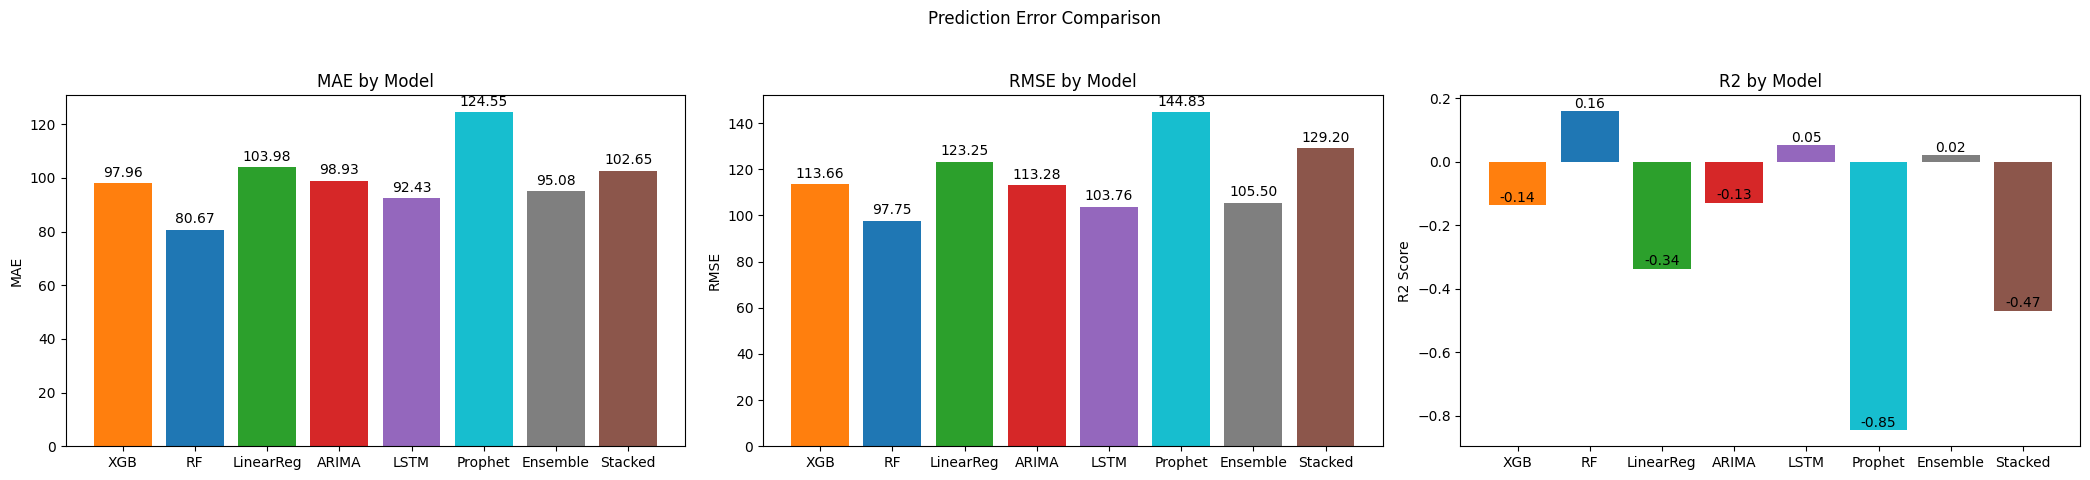

In [27]:
# Plot MAE and RMSE for available models (uses y_test and prediction arrays already in the notebook)
models = ['XGB', 'RF','LinearReg','ARIMA','LSTM','Prophet']
color_map = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan']
preds_list = [preds_xgb, preds_rf, preds_lr, preds_arima, preds_lstm, preds_prophet]

# metrics (ensure the order matches models/preds_list)
mae_list = [mae_xgb, mae_rf, mae_lr, mae_arima, mae_lstm, mae_prophet]
rmse_list = [rmse_xgb, rmse_rf, rmse_lr, rmse_arima, rmse_lstm, rmse_prophet]
r2_list = [r2_xgb, r2_rf, r2_lr, r2_arima, r2_lstm, r2_prophet]

# build a simple inverse-RMSE weighted ensemble (better performers get larger weight)
y_test_arr = np.array(y_test).flatten()
# guard against zeros in rmse_list
rmse_safe = np.array([r if (r is not None and r > 0) else 1e-8 for r in rmse_list], dtype=float)
inv_rmse = 1.0 / rmse_safe
weights = inv_rmse / inv_rmse.sum()
preds_arrays = [np.array(p).flatten() for p in preds_list]
# align lengths (resize if necessary) so we can compute weighted sum
preds_arrays = [np.resize(p, y_test_arr.shape) if p.size != y_test_arr.size else p for p in preds_arrays]
ensemble_pred = np.sum([w * p for w, p in zip(weights, preds_arrays)], axis=0)
rmse_ens = np.sqrt(mean_squared_error(y_test_arr, ensemble_pred))
mae_ens = mean_absolute_error(y_test_arr, ensemble_pred)
r2_ens = r2_score(y_test_arr, ensemble_pred)
print(f"Ensemble RMSE: {rmse_ens:.4f} | MAE: {mae_ens:.4f} | R2: {r2_ens:.4f}")

# append ensemble to lists for plotting
models.append('Ensemble')
color_map.append('tab:gray')
mae_list.append(mae_ens)
rmse_list.append(rmse_ens)
r2_list.append(r2_ens)
# append stacked ensemble metrics if available
try:
    # these variables are set in the stacking construction cell if stacking was performed
    models.append('Stacked')
    color_map.append('tab:brown')
    mae_list.append(mae_stack)
    rmse_list.append(rmse_stack)
    r2_list.append(r2_stack)
except NameError:
    pass

fig, axes = plt.subplots(1, 3, figsize=(21, 5))

# MAE bar plot
axes[0].bar(models, mae_list, color=color_map)
axes[0].set_title('MAE by Model')
axes[0].set_ylabel('MAE')
max_mae = max(mae_list) if mae_list else 0
for i, v in enumerate(mae_list):
    axes[0].text(i, v + max_mae*0.01, f"{v:.2f}", ha='center', va='bottom')

# RMSE bar plot
axes[1].bar(models, rmse_list, color=color_map)
axes[1].set_title('RMSE by Model')
axes[1].set_ylabel('RMSE')
max_rmse = max(rmse_list) if rmse_list else 0
for i, v in enumerate(rmse_list):
    axes[1].text(i, v + max_rmse*0.01, f"{v:.2f}", ha='center', va='bottom')

# R2 bar plot
axes[2].bar(models, r2_list, color=color_map)
axes[2].set_title('R2 by Model')
axes[2].set_ylabel('R2 Score')
max_r2 = max(r2_list) if r2_list else 0
for i, v in enumerate(r2_list):
    axes[2].text(i, v + (max_r2*0.01 if max_r2 else 0.01), f"{v:.2f}", ha='center', va='bottom')

plt.suptitle('Prediction Error Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()